In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from transformers import AutoModel, AutoTokenizer
from rich import print as rich_print
from datasets import load_dataset
from PIL import Image
import torch

from pathlib import Path

torch.manual_seed(0)

In [3]:
model = AutoModel.from_pretrained(
    "openbmb/MiniCPM-V-2_6",
    trust_remote_code=True,
    attn_implementation='sdpa', # or 'flash_attention_2'
    torch_dtype=torch.bfloat16,
)
model = model.eval().cuda()

tokenizer = AutoTokenizer.from_pretrained("openbmb/MiniCPM-V-2_6", trust_remote_code=True)

/mnt/arrakis/ephemeral/vlm-kotlin/server/.venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

/mnt/arrakis/ephemeral/vlm-kotlin/server/.venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [8]:
image = Image.open(Path("../data/doctors-note.jpg")).convert('RGB')
question = "What does the text in the image say?"
msgs = [
    {"role": "user", "content": [image, question]},
]

res = model.chat(
    image=None,
    msgs=msgs,
    tokenizer=tokenizer,
)
rich_print(res)

/mnt/arrakis/ephemeral/vlm-kotlin/server/.venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


The text in the image says:

"Dear Teacher,

Please excuse the absence of _____ on Friday. They were doing a special project for me (and the rest of the world) 
on strategies to address climate change. They'll be happy to give a class report for extra credit.

Regards,
Dr. Heather Price
Climate Scientist"

In [4]:
# Load the IAM-line dataset from Hugging Face
dataset = load_dataset("Teklia/IAM-line")

# Print some information about the dataset
print(f"Dataset structure: {dataset}")
print(f"Available splits: {dataset.keys()}")
print(f"Number of samples in train split: {len(dataset['train'])}")
print(f"Number of samples in test split: {len(dataset['test'])}")
print(f"Number of samples in validation split: {len(dataset['validation'])}")

Dataset structure: DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 6482
    })
    validation: Dataset({
        features: ['image', 'text'],
        num_rows: 976
    })
    test: Dataset({
        features: ['image', 'text'],
        num_rows: 2915
    })
})
Available splits: dict_keys(['train', 'validation', 'test'])
Number of samples in train split: 6482
Number of samples in test split: 2915
Number of samples in validation split: 976


In [5]:
idx = 10

gt = dataset['train'][idx]['text']
image = dataset['train'][idx]['image'].convert('RGB')
question = "What does the text in the image say?"
msgs = [
    {"role": "user", "content": [image, question]},
]

rich_print(msgs)

[
    {
        'role': 'user',
        'content': [
            <PIL.Image.Image image mode=RGB size=1371x128 at 0x76ED16BE27A0>,
            'What does the text in the image say?'
        ]
    }
]

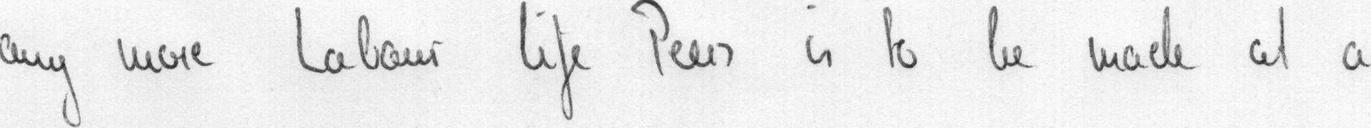

In [6]:
image

In [7]:
res = model.chat(
    image=None,
    msgs=msgs,
    tokenizer=tokenizer,
)
rich_print(res)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Any more Labour life Peer is to be made at a

In [36]:
print(gt)

any more Labour life Peers is to be made at a


In [9]:
res.lower(), gt.lower()

('any more labour life peer is to be made at a',
 'any more labour life peers is to be made at a')

In [35]:
import jiwer

jiwer.wer(res.lower().strip("."), gt.lower().strip("."))

0.3333333333333333